###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, G.F. Forsyth, C. Cooper. Based on [CFDPython](https://github.com/barbagroup/CFDPython), (c)2013 L.A. Barba, also under CC-BY license.

# Пространство и время

## Уравнение Бюргерса

Всем привет! Мы добрались до последнего занятия темы *Пространство и Время: Введение в конечно-разностные схемы для систем дифференциальных уравнений в частных производных*, второго модуля русской версии курса ["Practical Numerical Methods with Python"](http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about)
 
К настоящему моменту мы изучили конечно-разностные решения линейного и нелинейного уравнений переноса, а также уравнения диффузии. Пора объединить полученные знания для решения *уравнения Бюргерса*. 

Перед тем, как приступить к новым рубежам, убедитесь, что вы усвоили материал предыдущих занятий, это упростит нам жизнь. У вас должны быть собственные версии кода предыдущих занятий, написанные в отдельных блокнотах IPython или скриптах Python.

Про уравнение Бюргерса можно прочесть статью в [Википедии](https://ru.wikipedia.org/wiki/%D0%A3%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%91%D1%8E%D1%80%D0%B3%D0%B5%D1%80%D1%81%D0%B0), выглядит оно следующим образом:

\begin{equation}\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial ^2u}{\partial x^2}\end{equation}

Очевидно, что это комбинация нелинейного уравнения переноса и уравнения диффузии. Вы удивитесь, как много можно узнать из такого простого уравнения!

Его можно дискретизовать, применив уже известные нам схемы: например, правую разность по времени, левую по постранству и центральноразностную схему второго порядка для диффузионного члена. Получим:

\begin{equation}\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n - u_{i-1}^n}{\Delta x} = \nu \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}\end{equation}

Как и раньше, поскольку имеется начальное условие, единственным неизвестным остается $u_i^{n+1}$. Шаг по времени записывается в виде:

\begin{equation}u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)\end{equation}

### Начальные и граничные условия

Для изучения некоторых интересных свойств уравнения Бюргерса полезно использовать начальные и граничные условия, отличные от тех, что мы видели ранее.

Начальльное условие для нашей задачи выглядит так:

\begin{eqnarray}
u &=& -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi(t=0) = \phi_0 &=& \exp \bigg(\frac{-x^2}{4 \nu} \bigg) + \exp \bigg(\frac{-(x-2 \pi)^2}{4 \nu} \bigg)
\end{eqnarray}

У него есть аналитическое решение:

\begin{eqnarray}
u &=& -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi &=& \exp \bigg(\frac{-(x-4t)^2}{4 \nu (t+1)} \bigg) + \exp \bigg(\frac{-(x-4t -2 \pi)^2}{4 \nu(t+1)} \bigg)
\end{eqnarray}

Граничное условие попроще, но тоже не совсем обычное:

\begin{equation}u(0) = u(2\pi)\end{equation}

Такое условме называется *периодическим*. С ним нужно быть повнимательнее, иначе не головная боль гарантирована.

### Экономим время с SymPy

Вручную выписывать граничное условие, которое мы используем, несколько болезненно. Не то, чтобы производная $\frac{\partial \phi}{\partial x}$ была такой уж сложной, просто мы запросто можем перепутать знак или потерять множитель $x$. Чтобы избежать таких ошибок, воспользуемся SymPy.

[SymPy](http://sympy.org/en/) – это библиотека для символьных вычислений. По функционалу она имеет много общего с Mathematica, плюс полученные результаты с легкостью превращаюся обратно в код Python(ну и еще все это бесплатно и свободно).

Начнем, как всегда, с импорта библиотек: этой и нашей любимой, NumPy.

In [2]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Ешё нужно сообщить SymPy, что мы хотим, чтобы весь вывод отображался средствами $\LaTeX$. Это сделает наш блокнот прекрасным!

In [3]:
from sympy import init_printing
init_printing()

Начнем с создания символьных переменных для тех трех переменных, что используются в нашем начальном условии. Важно помнить, что определенные при помощи SymPy пременные ведут себя не так, как "обычные" переменыне Python. 

Если набрать `x` в блок для кода, получим сообщене об ошибке:

In [4]:
x

NameError: name 'x' is not defined

Поскольну `x` не определен, нет никаких неожиданностей. Теперь зададим`x` в качеству *символьной* переменной:

In [5]:
x = sympy.symbols('x')

Посмотрим, что случится, если теперь набрать `x` в ячейке для кода:

In [6]:
x

Значением `x` является $x$. SymPy ещё называют системой компьютерной алгебры – обычно значением выражения `5*x` является произведение `5` и `x`, чем бы этот `x` ни являлся. Однако, если `x` опрнеделен как символьная переменная, происходит нечто иное:

In [7]:
5*x

Это позволяет нам манипулировать уравнениями с неизвестными при помощи Python. Начнем с задания символов $x$, $\nu$ и $t$, а затем запишем уравнение для $\phi$ целиком. В итоге получем красивое отображение уравнения для $\phi$

In [8]:
x, nu, t = sympy.symbols('x nu t')
phi = sympy.exp(-(x-4*t)**2/(4*nu*(t+1))) + \
sympy.exp(-(x-4*t-2*numpy.pi)**2/(4*nu*(t+1)))
phi

Мелковато, правда, но выглядит правильно. Теперь ничего не стоит выписать выражение для производной $\frac{\partial \phi}{\partial x}$. Для этого есть специальное средство:

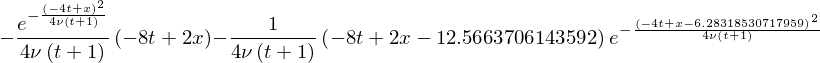

In [9]:
phiprime = phi.diff(x)
phiprime

Необработанную версию можно вывести, если воспольлзоваться командой `print`.

In [10]:
print(phiprime)

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))


### И что дальше?

Теперь, когда у нас имеется выражение для производной, переведенное в Python-код, можно, наконец, записать все начальное условие в виде Python выражения. Для этой цели воспользуемся функцией *lambdify*, которая превращает символьное уравнение SymPy в функцию.  

In [11]:
from sympy.utilities.lambdify import lambdify

u = -2*nu*(phiprime/phi)+4
print(u)

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


### Lambdify

Для того чтобы преобразовать выражене в функцию, нужно указать, какие символы являются зависимыми, а какие – нет.

In [12]:
u_lamb = lambdify((t, x, nu), u)
print("The value of u at t=1, x=4, nu=3 is {}.".format(u_lamb(1,4,3)))

The value of u at t=1, x=4, nu=3 is 3.4917066420644494.


### Возвращаемся к уравнению Бюргерса

Разобравшись с начальными условиями, можно продолжить постановку задачи. Визуализировать начальное условие можно при помощи только что созданной функции.

In [13]:
###variable declarations
nx = 101
nt = 100
dx = 2*numpy.pi/(nx-1)
nu = .07
sigma = .1
dt = sigma*dx**2/nu 

x = numpy.linspace(0, 2*numpy.pi, nx)
un = numpy.empty(nx)
t = 0

Одной функции мало, нужно создать массив `u`, содержащий значения начального условия. Функция `u_lamb` возвращает значения в заданный момент времени $t$, в точке $x$. Чтобы получить массив значений `u` можно испоьлзовать цикл по `x`. То есть написать что-то вроде:

```Python
u = numpy.empty(nx)

for i, x0 in enumerate(x):
    u[i] = u_lamb(t, x0, nu)
```

Но есть более красивый способ – *компоновка списков*

Получить список нужных значений `u` можно так:

```Python
[u_lamb(t, x0, nu) for x0 in x]
```

Синтаксис похож на обычный цикл `for`, но все выражение занимает всего лишь одну строку! Компоновка списков создает ... список. Он отличается от *массива*, но преобразовать список в массив можно, используя `numpy.asarray()`.

```Python
u = numpy.asarray([u_lamb(t, x0, nu) for x0 in x])
```

In [14]:
u = numpy.asarray([u_lamb(t, x0, nu) for x0 in x])
u

array([ 4.        ,  4.06283185,  4.12566371,  4.18849556,  4.25132741,
        4.31415927,  4.37699112,  4.43982297,  4.50265482,  4.56548668,
        4.62831853,  4.69115038,  4.75398224,  4.81681409,  4.87964594,
        4.9424778 ,  5.00530965,  5.0681415 ,  5.13097336,  5.19380521,
        5.25663706,  5.31946891,  5.38230077,  5.44513262,  5.50796447,
        5.57079633,  5.63362818,  5.69646003,  5.75929189,  5.82212374,
        5.88495559,  5.94778745,  6.0106193 ,  6.07345115,  6.136283  ,
        6.19911486,  6.26194671,  6.32477856,  6.38761042,  6.45044227,
        6.51327412,  6.57610598,  6.63893783,  6.70176967,  6.76460125,
        6.82742866,  6.89018589,  6.95176632,  6.99367964,  6.72527549,
        4.        ,  1.27472451,  1.00632036,  1.04823368,  1.10981411,
        1.17257134,  1.23539875,  1.29823033,  1.36106217,  1.42389402,
        1.48672588,  1.54955773,  1.61238958,  1.67522144,  1.73805329,
        1.80088514,  1.863717  ,  1.92654885,  1.9893807 ,  2.05

Наконец-то мы можем увидеть, что из себя представляет $\phi(x,0)$:

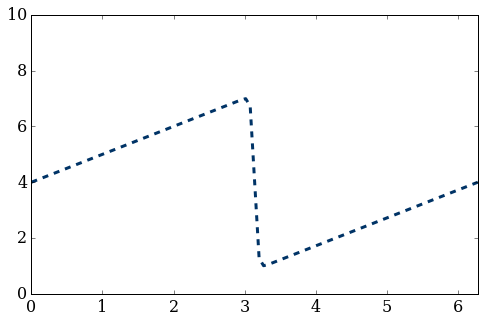

In [15]:
pyplot.figure(figsize=(8,5), dpi=100)
pyplot.plot(x,u, color='#003366', ls='--', lw=3)
pyplot.xlim([0,2*numpy.pi])
pyplot.ylim([0,10]);

Результат определенно не похож на ступеньку, которой мы пользовались в качестве начального условия ранее. Это "пилообразная" функция или "пила". Посмотрим, что дальше.

### Периодические граничные условия

Будем решать уравнение Бюргерса с *периодическими* граничными условиями. Если вы экспериментировали с блокнотами, реализующими линейный и нелинейный перенос, и пытались увеличить время расчета (увеличивая значение переменной `nt`), вы могли заметить, что волна продолжает бежать слева направо, пока не скроется за границы графика.

С периодическими же словиями, когда точка достигает правой границы, она *возвращается* с левой стороны.

Вспомним формулу дискретизации, которую мы получили в начале блокнота:

\begin{equation}u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)\end{equation}

Что означает $u_{i+1}^n$, когда $i$ находится на границе расчетной области? 

In [16]:
for n in range(nt):
    un = u.copy()
    
    u[1:-1] = un[1:-1] - un[1:-1] * dt/dx * (un[1:-1] - un[:-2]) + nu*dt/dx**2*\
                    (un[2:] - 2*un[1:-1] + un[:-2])

    u[0] = un[0] - un[0] * dt/dx * (un[0] - un[-1]) + nu*dt/dx**2*\
                (un[1] - 2*un[0] + un[-1])
    u[-1] = un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) + nu*dt/dx**2*\
                (un[0]- 2*un[-1] + un[-2])
        
u_analytical = numpy.asarray([u_lamb(nt*dt, xi, nu) for xi in x])

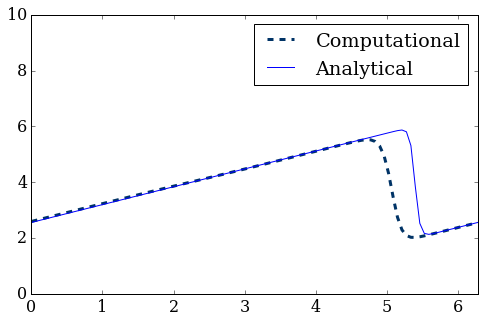

In [17]:
pyplot.figure(figsize=(8,5), dpi=100)
pyplot.plot(x,u, color='#003366', ls='--', lw=3, label='Computational')
pyplot.plot(x, u_analytical, label='Analytical')
pyplot.xlim([0,2*numpy.pi])
pyplot.ylim([0,10])
pyplot.legend();

In [18]:
from matplotlib import animation
from IPython.display import HTML

In [19]:
u = numpy.asarray([u_lamb(t, x0, nu) for x0 in x])

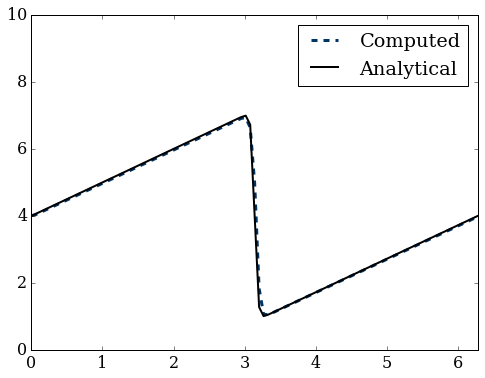

In [20]:
fig = pyplot.figure(figsize=(8,6))
ax = pyplot.axes(xlim=(0,2*numpy.pi), ylim=(0,10))
line = ax.plot([], [], color='#003366', ls='--', lw=3)[0]
line2 = ax.plot([], [], 'k-', lw=2)[0]
ax.legend(['Computed','Analytical'])

def burgers(n):
       
    un = u.copy()
        
    u[1:-1] = un[1:-1] - un[1:-1] * dt/dx * (un[1:-1] - un[:-2]) + nu*dt/dx**2*\
                    (un[2:] - 2*un[1:-1] + un[:-2])

    u[0] = un[0] - un[0] * dt/dx * (un[0] - un[-1]) + nu*dt/dx**2*\
                (un[1] - 2*un[0] + un[-1])
    u[-1] = un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) + nu*dt/dx**2*\
                (un[0]- 2*un[-1] + un[-2])
        
    u_analytical = numpy.asarray([u_lamb(n*dt, xi, nu) for xi in x])
    line.set_data(x,u)
    line2.set_data(x, u_analytical)
    

anim = animation.FuncAnimation(fig, burgers,
                        frames=nt, interval=100)


In [21]:
HTML(anim.to_html5_video())

OSError: [Errno 22] Invalid argument

## Ускорение расчетов при помощи матричных операций

Программная реализация численных схем при помощи матричных операций может показаться несколько неудобной. Такой подход требует больших умственных усилий, чем два цикла `for`. Возникает вопрос, зачем все это? Из-за скорости. 

Так выглядел бв код для решения уравнения Бюргерса с циклами. Такой код легче писать, к тому же нужно всего лишь одно дополнительное условие для реализации периодических границ. 

Давайте посмотрим, сколько времени уходит на выполнение такого кода. Для этого воспользуемся "магической функцией" — декоратором  `%%timeit`.

In [22]:
%%timeit

u = numpy.asarray([u_lamb(t, x0, nu) for x0 in x])

for n in range(nt):
    un = u.copy()
    
    for i in range(nx-1):
        u[i] = un[i] - un[i] * dt/dx *(un[i] - un[i-1]) + nu*dt/dx**2*\
                (un[i+1]-2*un[i]+un[i-1])
    
    u[-1] = un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) + nu*dt/dx**2*\
                (un[0]- 2*un[-1] + un[-2])
    

10 loops, best of 3: 25.2 ms per loop


Меньше 50 милисекунд. Неплохо, 

Теперь проверим матричые операции. Мы ничего не меняем в нашем коде, только добавляем `%%timeit` и заново инициализируем `u`.

Как мы уже знаем, такой подход требует больше усилий и, кроме того, значения на обоих границах требуют особого подхода. Стоит оно того?

In [23]:
%%timeit

u = numpy.asarray([u_lamb(t, x0, nu) for x0 in x])

for n in range(nt):
    un = u.copy()
    
    u[1:-1] = un[1:-1] - un[1:-1] * dt/dx * (un[1:-1] - un[:-2]) + nu*dt/dx**2*\
                    (un[2:] - 2*un[1:-1] + un[:-2])

    u[0] = un[0] - un[0] * dt/dx * (un[0] - un[-1]) + nu*dt/dx**2*\
                (un[1] - 2*un[0] + un[-1])
    u[-1] = un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) + nu*dt/dx**2*\
                (un[0]- 2*un[-1] + un[-2])


100 loops, best of 3: 3.08 ms per loop


Еще как стоит! Пятикратный прирост в скорости. Для наших упражнений дополнительные 40 милисекунд погоды не сделают, но в реальных условиях с миллионами итераций так можно сэкономить значительн

Yes, it is absolutely worth it.  That's a nine-fold speed increase.  For this exercise, you probably won't miss the extra 40 milliseconds if you use the nested `for` loops, but what about a simulation that has to run through millions and millions of iterations?  Then that little extra effort at the beginning will definitely pay off.  

---

###### The cell below loads the style of the notebook.

In [23]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())